In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("/Users/claireleblanc/Downloads/degron_data.csv")

In [3]:
positives = ["R", "K"]
negatives = ["D", "E"]

hydrophobics = ["M", "I", "L", "V", "A", "F", "Y", "W"]

In [4]:
def contains_three_hydrophobics(seq):
    for i in range(len(seq)-5):
        if seq[i] in hydrophobics:
            if seq[i+1] in hydrophobics:
                if seq[i+2] in hydrophobics:
                    return True
    return False

def contains_two_hydrophobics(seq):
    for i in range(len(seq)-3):
        if seq[i] in hydrophobics:
            if seq[i+1] in hydrophobics:
                return True
    return False


def contains_one_hydrophobics(seq):
    for i in range(len(seq)-1):
        if seq[i] in hydrophobics:
            return True
    return False

In [5]:
data["ends_w_charge"] = [(s[-1] in positives) | (s[-1] in negatives) for s in data["aa"]]
data["ends_w_hydrophobic"] = [(s[-1] in hydrophobics) for s in data["aa"]]


data["ends_w_two_charge"] = [((s[-1] in positives) | (s[-1] in negatives)) & ((s[-2] in positives) | (s[-2] in negatives)) for s in data["aa"]]
data["ends_w_two_hydrophobic"] = [(s[-1] in hydrophobics) & (s[-2] in hydrophobics) for s in data["aa"]]

data["ends_w_three_charge"] = [((s[-1] in positives) | (s[-1] in negatives)) & ((s[-2] in positives) | (s[-2] in negatives)) & ((s[-3] in positives) | (s[-3] in negatives)) for s in data["aa"]]
data["ends_w_three_hydrophobic"] = [(s[-1] in hydrophobics) & (s[-2] in hydrophobics) & (s[-3] in hydrophobics) for s in data["aa"]]

data["contains_three_hydrophobic"] = [contains_three_hydrophobics(s) for s in data["aa"]]
data["contains_two_hydrophobic"] = [contains_two_hydrophobics(s) for s in data["aa"]]
data["contains_hydrophobic"] = [contains_one_hydrophobics(s) for s in data["aa"]]

In [7]:
data.columns

Index(['name', 'gene', 'first_resi', 'last_resi', 'copyof_dna', 'copyof_aa',
       'lib', 'aa', 'dna', 'zf', 'n', 'degron_score', 'degron_std',
       'abundance_score', 'abundance_std', 'pap_ct', 'pap', 'locnes',
       'locnes_score', 'tile_rasa_median', 'tile_plddt_median',
       'ends_w_charge', 'ends_w_hydrophobic', 'ends_w_two_charge',
       'ends_w_two_hydrophobic', 'ends_w_three_charge',
       'ends_w_three_hydrophobic', 'contains_three_hydrophobic',
       'contains_two_hydrophobic', 'contains_hydrophobic'],
      dtype='object')

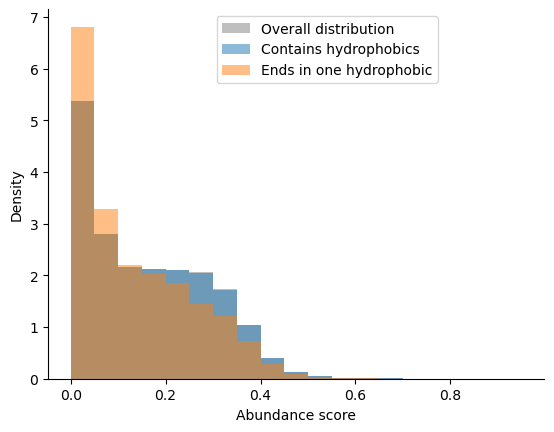

In [ ]:
plt.hist(data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

plt.hist(data[data["contains_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains hydrophobics", bins=np.arange(0, 1, 0.05))
plt.hist(data[data["ends_w_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in one hydrophobic",  bins=np.arange(0, 1, 0.05))
plt.xlabel("Abundance score")
plt.ylabel("Density")

plt.legend(bbox_to_anchor=(0.8,1))
sns.despine()

plt.savefig("../figures/degron_screen_one_hydro.pdf", format='pdf', bbox_inches='tight')

In [75]:
from scipy.stats import mannwhitneyu
group1 = data[data['ends_w_hydrophobic']]['abundance_score'].dropna()
group2 = data[data['contains_hydrophobic']]['abundance_score'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

2.9029504930694736e-149

In [77]:
from scipy.stats import mannwhitneyu
group1 = data[data['contains_hydrophobic']]['abundance_score'].dropna()
group2 = data['abundance_score'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

0.4703330886918703

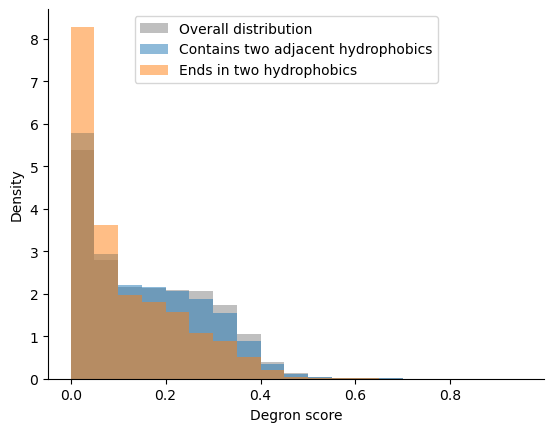

In [15]:
plt.hist(data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

plt.hist(data[data["contains_two_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains two adjacent hydrophobics", bins=np.arange(0, 1, 0.05))
plt.hist(data[data["ends_w_two_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in two hydrophobics",  bins=np.arange(0, 1, 0.05))
plt.xlabel("Degron score")
plt.ylabel("Density")

plt.legend(bbox_to_anchor=(0.8,1))
sns.despine()

plt.savefig("../figures/degron_screen_two_hydro.pdf", format='pdf', bbox_inches='tight')

In [78]:
group1 = data[data['ends_w_two_hydrophobic']]['abundance_score'].dropna()
group2 = data['abundance_score'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

4.154784204817274e-200

In [83]:
group1 = data[data['ends_w_two_hydrophobic']]['abundance_score'].dropna()
group2 = data[data['contains_two_hydrophobic']]['abundance_score'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

1.4244529432822889e-139

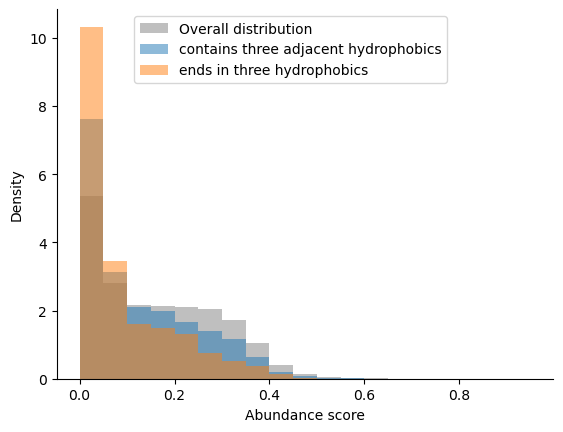

In [ ]:
plt.hist(data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

plt.hist(data[data["contains_three_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="contains three adjacent hydrophobics", bins=np.arange(0, 1, 0.05))
plt.hist(data[data["ends_w_three_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="ends in three hydrophobics",  bins=np.arange(0, 1, 0.05))
plt.xlabel("Abundance score")
plt.ylabel("Density")

plt.legend(bbox_to_anchor=(0.8,1))

sns.despine()

plt.savefig("../figures/degron_screen_three_hydro.pdf", format='pdf', bbox_inches='tight')

In [80]:
group1 = data[data['ends_w_three_hydrophobic']]['abundance_score'].dropna()
group2 = data['abundance_score'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

1.2762936139873646e-145

In [82]:
group1 = data[data['ends_w_three_hydrophobic']]['abundance_score'].dropna()
group2 = data[data['contains_three_hydrophobic']]['abundance_score'].dropna()
stat, p = mannwhitneyu(group1, group2, alternative="less") 
p

3.970564437775316e-40

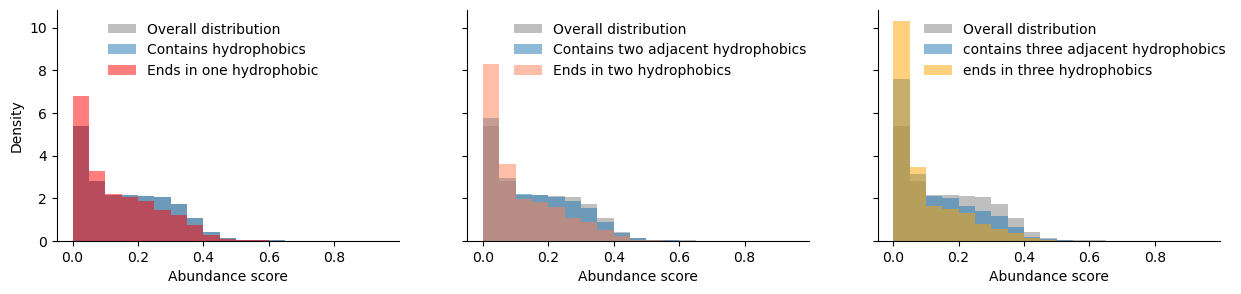

In [70]:
fig, axs = plt.subplots(1, 3, figsize=(15,3), sharey=True, sharex=True)
axs[0].hist(data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[0].hist(data[data["contains_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains hydrophobics", bins=np.arange(0, 1, 0.05))
axs[0].hist(data[data["ends_w_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in one hydrophobic",  bins=np.arange(0, 1, 0.05), color="red")
axs[0].set_xlabel("Abundance score")
axs[0].set_ylabel("Density")

axs[0].legend(bbox_to_anchor=(0.8,1), frameon=False)

axs[1].hist(data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[1].hist(data[data["contains_two_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains two adjacent hydrophobics", bins=np.arange(0, 1, 0.05))
axs[1].hist(data[data["ends_w_two_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in two hydrophobics",  bins=np.arange(0, 1, 0.05), color="coral")
axs[1].set_xlabel("Abundance score")

axs[1].legend(bbox_to_anchor=(0.1,1), frameon=False)

axs[2].hist(data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[2].hist(data[data["contains_three_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="contains three adjacent hydrophobics", bins=np.arange(0, 1, 0.05))
axs[2].hist(data[data["ends_w_three_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="ends in three hydrophobics",  bins=np.arange(0, 1, 0.05), color="orange")
axs[2].set_xlabel("Abundance score")

axs[2].legend(bbox_to_anchor=(0.1,1), frameon=False)

sns.despine()

plt.savefig("../figures/degron_screen_all.pdf", format='pdf', bbox_inches='tight')

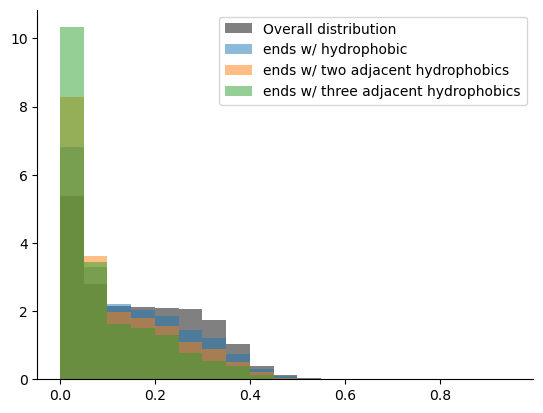

In [21]:
plt.hist(data["abundance_score"], density=True, label="Overall distribution",  bins=np.arange(0, 1, 0.05), color='grey')
plt.hist(data[data["ends_w_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="ends w/ hydrophobic", bins=np.arange(0, 1, 0.05))
plt.hist(data[data["ends_w_two_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="ends w/ two adjacent hydrophobics", bins=np.arange(0, 1, 0.05))
plt.hist(data[data["ends_w_three_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="ends w/ three adjacent hydrophobics", bins=np.arange(0, 1, 0.05))

plt.legend(bbox_to_anchor=(1,1))
sns.despine()
plt.show()

In [39]:
data[data['abundance_score'] < 0.1]["ends_w_three_hydrophobic"].sum() / len(data[data['abundance_score'] < 0.1])

0.05077574047954866

In [34]:
data[data['abundance_score'] < 0.1]["ends_w_two_hydrophobic"].sum() / len(data[data['abundance_score'] < 0.1])

0.147307724218037

In [35]:
data[data['abundance_score'] < 0.1]["ends_w_hydrophobic"].sum() / len(data[data['abundance_score'] < 0.1])

0.386252385298266

In [40]:
data[data['abundance_score'] > 0.1]["ends_w_three_hydrophobic"].sum() / len(data[data['abundance_score'] > 0.1])

0.015869378401604125

In [37]:
data[data['abundance_score'] > 0.1]["ends_w_two_hydrophobic"].sum() / len(data[data['abundance_score'] > 0.1])

0.06906330564308222

In [38]:
data[data['abundance_score'] > 0.1]["ends_w_hydrophobic"].sum() / len(data[data['abundance_score'] > 0.1])

0.2617588083643655

# Looking at the second degron screen

In [56]:
TF_data = pd.read_excel("/Users/claireleblanc/Documents/grad_school/staller_lab/Data/TF_degron_screen.xlsx")

In [ ]:
TF_data["ends_w_charge"] = [(s[-1] in positives) | (s[-1] in negatives) for s in TF_data["aa"]]
TF_data["ends_w_hydrophobic"] = [(s[-1] in hydrophobics) for s in TF_data["aa"]]


TF_data["ends_w_two_charge"] = [((s[-1] in positives) | (s[-1] in negatives)) & ((s[-2] in positives) | (s[-2] in negatives)) for s in TF_data["aa"]]
TF_data["ends_w_two_hydrophobic"] = [(s[-1] in hydrophobics) & (s[-2] in hydrophobics) for s in TF_data["aa"]]

TF_data["ends_w_three_charge"] = [((s[-1] in positives) | (s[-1] in negatives)) & ((s[-2] in positives) | (s[-2] in negatives)) & ((s[-3] in positives) | (s[-3] in negatives)) for s in TF_data["aa"]]
TF_data["ends_w_three_hydrophobic"] = [(s[-1] in hydrophobics) & (s[-2] in hydrophobics) & (s[-3] in hydrophobics) for s in TF_data["aa"]]

TF_data["contains_three_hydrophobic"] = [contains_three_hydrophobics(s) for s in TF_data["aa"]]
TF_data["contains_two_hydrophobic"] = [contains_two_hydrophobics(s) for s in TF_data["aa"]]
TF_data["contains_hydrophobic"] = [contains_one_hydrophobics(s) for s in TF_data["aa"]]

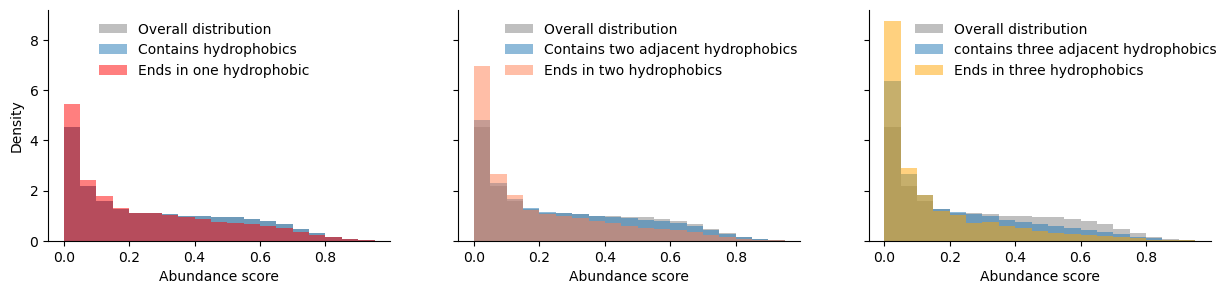

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(15,3), sharey=True, sharex=True)
axs[0].hist(TF_data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[0].hist(TF_data[TF_data["contains_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains hydrophobics", bins=np.arange(0, 1, 0.05))
axs[0].hist(TF_data[TF_data["ends_w_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in one hydrophobic",  bins=np.arange(0, 1, 0.05), color="red")
axs[0].set_xlabel("Abundance score")
axs[0].set_ylabel("Density")

axs[0].legend(bbox_to_anchor=(0.8,1), frameon=False)

axs[1].hist(TF_data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[1].hist(TF_data[TF_data["contains_two_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains two adjacent hydrophobics", bins=np.arange(0, 1, 0.05))
axs[1].hist(TF_data[TF_data["ends_w_two_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in two hydrophobics",  bins=np.arange(0, 1, 0.05), color="coral")
axs[1].set_xlabel("Abundance score")

axs[1].legend(bbox_to_anchor=(0.1,1), frameon=False)

axs[2].hist(TF_data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[2].hist(TF_data[TF_data["contains_three_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="contains three adjacent hydrophobics", bins=np.arange(0, 1, 0.05))
axs[2].hist(TF_data[TF_data["ends_w_three_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in three hydrophobics",  bins=np.arange(0, 1, 0.05), color="orange")
axs[2].set_xlabel("Abundance score")

axs[2].legend(bbox_to_anchor=(0.1,1), frameon=False)

sns.despine()

plt.savefig("../figures/TF_degron_screen_all.pdf", format='pdf', bbox_inches='tight')